In [1]:
!pip install torch==2.0.1 torchvision==0.15.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [15]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!cd yolov5 & pip install -r requirements.txt

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\MD Raffaul Islam/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-19 Python-3.11.9 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
img = 'https://c1.peakpx.com/wallpaper/66/449/235/people-pedestrian-man-woman-wallpaper-preview.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 646x970 14 persons, 1 car, 1 backpack, 3 handbags
Speed: 485.0ms pre-process, 277.1ms inference, 96.8ms NMS per image at shape (1, 3, 448, 640)


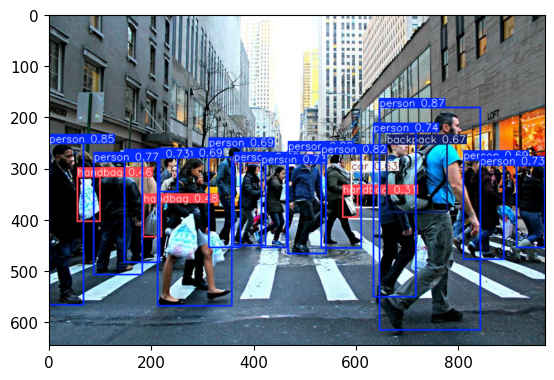

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.render()

[array([[[ 72,  91,  97],
         [ 73,  94,  99],
         [ 70,  95,  99],
         ...,
         [ 37,  48,  44],
         [ 43,  48,  51],
         [ 54,  59,  62]],
 
        [[ 64,  83,  89],
         [ 67,  88,  93],
         [ 68,  93,  97],
         ...,
         [ 44,  54,  53],
         [ 76,  84,  86],
         [ 87,  92,  95]],
 
        [[ 61,  82,  87],
         [ 63,  87,  91],
         [ 68,  93,  97],
         ...,
         [ 75,  85,  84],
         [ 85,  93,  95],
         [ 92, 100, 103]],
 
        ...,
 
        [[ 65,  97, 118],
         [ 65,  98, 117],
         [ 73, 104, 124],
         ...,
         [ 46,  68,  79],
         [ 51,  71,  82],
         [ 56,  74,  86]],
 
        [[ 70, 101, 122],
         [ 64,  95, 115],
         [ 75, 103, 124],
         ...,
         [ 44,  66,  77],
         [ 48,  68,  79],
         [ 53,  73,  84]],
 
        [[ 72, 100, 122],
         [ 62,  90, 111],
         [ 78, 105, 126],
         ...,
         [ 44,  68,  78],
  

## Real_Time_detection (Testing cam)

In [24]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Train from Scratch

In [9]:
import uuid   # Unique identifier
import os
import time

In [10]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy', 'yawn']
number_imgs = 20

## Capture Real-time frame to form dataset

In [14]:
cap = cv2.VideoCapture(1)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [11]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.d0a4d74b-c6a9-11ef-acc1-161333042829.jpg


In [12]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.d15dae82-c6a9-11ef-9e47-161333042829.jpg
data\images\awake.d15dae83-c6a9-11ef-b9ef-161333042829.jpg
data\images\awake.d15dae84-c6a9-11ef-b982-161333042829.jpg
data\images\awake.d15dae85-c6a9-11ef-814d-161333042829.jpg
data\images\awake.d15dae86-c6a9-11ef-a84a-161333042829.jpg
data\images\awake.d15dae87-c6a9-11ef-90b1-161333042829.jpg
data\images\awake.d15dae88-c6a9-11ef-80e9-161333042829.jpg
data\images\awake.d15dae89-c6a9-11ef-bc92-161333042829.jpg
data\images\awake.d15dae8a-c6a9-11ef-8e29-161333042829.jpg
data\images\awake.d15dae8b-c6a9-11ef-a4c1-161333042829.jpg
data\images\awake.d15dae8c-c6a9-11ef-83d3-161333042829.jpg
data\images\awake.d15dae8d-c6a9-11ef-b8ea-161333042829.jpg
data\images\awake.d15dae8e-c6a9-11ef-a0dd-161333042829.jpg
data\images\awake.d15dae8f-c6a9-11ef-91d3-161333042829.jpg
data\images\awake.d15dae90-c6a9-11ef-9b57-161333042829.jpg
data\images\awake.d15dae91-c6a9-11ef-a79d-161333042829.jpg
data\images\awake.d15dae92-c6a9-11ef-9f45-161333042829.j

## For Labeling the Image

In [13]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [13]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

## Start Training

In [11]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 900 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=900, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'C:\Users\MD': Invalid argument
YOLOv5  2024-12-19 Python-3.11.9 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, 

In [15]:
## If needed to train in medium model of yolov5n.pt 

In [ ]:
# !cd yolov5 && python train.py --img 320 --batch 8 --epochs 600 --data dataset.yaml --weights yolov5n.pt

## Load The Custom Model

In [15]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp14/weights/last.pt')

Using cache found in C:\Users\MD Raffaul Islam/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-19 Python-3.11.9 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


image 1/1: 480x640 1 awake
Speed: 4.0ms pre-process, 9.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


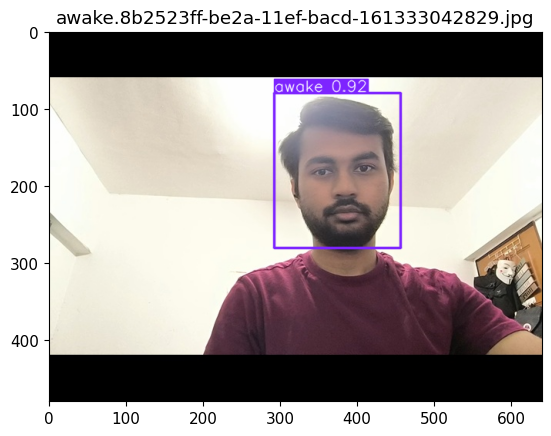

image 1/1: 480x640 1 yawn
Speed: 7.0ms pre-process, 7.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


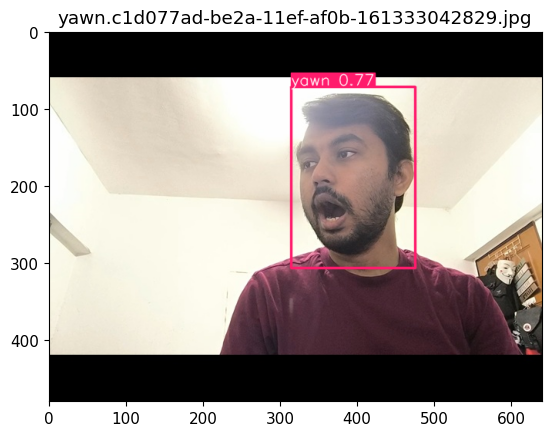

image 1/1: 480x640 1 drowsy
Speed: 4.3ms pre-process, 7.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


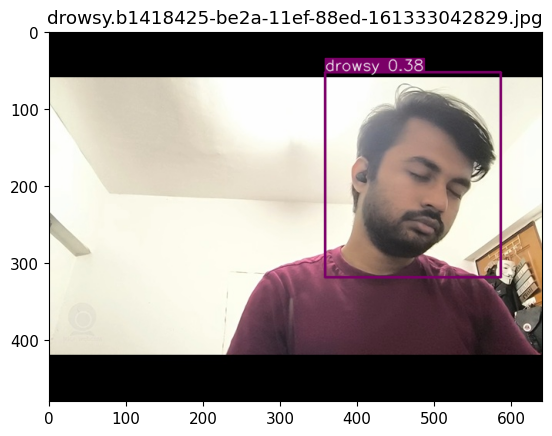

In [16]:
image_files = [
    os.path.join('data', 'images', 'awake.8b2523ff-be2a-11ef-bacd-161333042829.jpg'),
    os.path.join('data', 'images', 'yawn.c1d077ad-be2a-11ef-af0b-161333042829.jpg'),
    os.path.join('data', 'images', 'drowsy.b1418425-be2a-11ef-88ed-161333042829.jpg')
]

# Process and display each image
for img_path in image_files:
    img = img_path
    results = model(img)
    results.print()
    
    # Display the image with results
    %matplotlib inline
    plt.figure()
    plt.imshow(np.squeeze(results.render()))
    plt.title(os.path.basename(img_path))
    plt.axis('on')
    plt.show()

In [17]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()